<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Прогнозирование-логистической-регрессией" data-toc-modified-id="Прогнозирование-логистической-регрессией-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Прогнозирование логистической регрессией</a></span></li><li><span><a href="#Прогнозирование-случайным-лесом" data-toc-modified-id="Прогнозирование-случайным-лесом-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Прогнозирование случайным лесом</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Использование-балансировки-классов" data-toc-modified-id="Использование-балансировки-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Использование балансировки классов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Увеличение-обущающей-выборки-(upsampling)" data-toc-modified-id="Увеличение-обущающей-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение обущающей выборки (upsampling)</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия-" data-toc-modified-id="Логистическая-регрессия--3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия <a id="bal_log_reg"></a></a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Прогнозирование-лучшей-моделью-на-тестовой-выборке" data-toc-modified-id="Прогнозирование-лучшей-моделью-на-тестовой-выборке-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Прогнозирование лучшей моделью на тестовой выборке</a></span></li><li><span><a href="#Сравнение-с-дамми-классификатором" data-toc-modified-id="Сравнение-с-дамми-классификатором-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сравнение с дамми-классификатором</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет по историческим данным о поведении клиентов и расторжении договоров с банком. 

Постройть модель необходимо с предельно большим значением *F1*-меры, нужно довести метрику до 0.59.  

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [102]:
#!pip install scikit-learn==1.1.3

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import (
    accuracy_score as acc, 
    recall_score as recall, 
    precision_score as precision,
    confusion_matrix, 
    f1_score as f1, 
    roc_auc_score, 
    roc_curve,
    average_precision_score as aps
)
import matplotlib.pyplot as plt
import numpy as np

## Подготовка данных

In [3]:
data = pd.read_csv('datasets/Churn.csv')
data.columns = data.columns.str.lower()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Идентификационная информация не поможет нам в классификации: ID клиента, информацию о фамилии можно опустить. Также удалим индекс строк `'rownumber'` за ненадобностью.

In [6]:
data.drop(columns=['rownumber', 'surname', 'customerid'], axis=1, inplace=True)

In [7]:
data.shape #осталось 11 столбцов

(10000, 11)

Столбец `'gender'` обработаем порядковым кодированием, а для трех стран в `'geography'` создадим дамми-переменные.

In [8]:
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes #так реализовать проще, чем через OrdinalEncoder (female - 0, male - 1)

Чтобы не терять 10% выборки, заполним пропуски в `'tenure'` (сколько лет является клиентом). Посмотрим на распределение признака:

<AxesSubplot:>

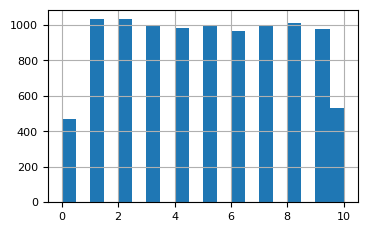

In [101]:
data['tenure'].hist(bins=20, figsize=(4, 2.5))

Мы имеем почти одинаковое количество всех значений, заполним пропуски случайными числами.

In [10]:
rows = data['tenure'].isna()
data.loc[rows, 'tenure'] = np.random.randint(0, 11, data['tenure'].isna().sum())

In [11]:
data['tenure'].isna().sum()

0

Можно снова посмотреть на распределение, его характер сохранился.

In [12]:
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2.0,125510.82,1,1,1,79084.10,0


Баланс на карте и оцененная зарплата могут запутать модель своими высокими значениями, проведем стандартизацию всех численных признаков. <br>
Перед этим разделим выборки на train, val и test, чтобы при стандартизации избежать утечек информации в тестовую и валидационную выборки.

Поскольку нет заранее отложенной тестовой выборки, отнесем 60% наблюдений в train, 20% для валидации и 20% в test:

In [13]:
features = data.drop('exited', axis=1)
target = data['exited']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, shuffle=True) #0.8*0.25=0.2

In [15]:
print(x_train.shape) #соотношения верные
print(x_val.shape)
print(x_test.shape)

(6000, 10)
(2000, 10)
(2000, 10)


Создадим дамми-переменные для колонки `'geography'`:

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
ohe_features = [col for col in features.columns if col=='geography']

encoder.fit(x_train[ohe_features])
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
x_train[encoder.get_feature_names_out()] = encoder.fit_transform(x_train[ohe_features])
x_val[encoder.get_feature_names_out()] = encoder.transform(x_val[ohe_features])
x_test[encoder.get_feature_names_out()] = encoder.transform(x_test[ohe_features])

In [17]:
x_train.head(1) #осталась колонка geography

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain
8588,712,Spain,0,29,7.0,77919.78,1,1,0,122547.58,0.0,1.0


In [18]:
for item in [x_train, x_val, x_test]:
    item.drop('geography', axis=1, inplace=True)

In [19]:
pd.options.mode.chained_assignment = None

numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']
scaler = StandardScaler()
x_train[numeric] = scaler.fit_transform(x_train[numeric])
x_val[numeric] = scaler.transform(x_val[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

In [20]:
x_train.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain
8588,0.626553,0,-0.948125,0.700914,0.026803,1,1,0,0.389943,0.0,1.0
3178,-1.143262,0,0.006684,-0.332882,0.538874,2,1,1,-1.026089,0.0,0.0
5200,-1.455583,1,0.293126,1.390111,0.283178,2,1,0,-1.486725,1.0,0.0
8889,-0.747657,0,0.006684,1.390111,0.833254,1,1,0,-0.246001,0.0,0.0
5789,0.387107,0,1.534377,-1.366678,0.000856,1,1,0,-1.006993,1.0,0.0


**Остальные признаки оставим как есть, преобразовывать их не требуется — они годятся для прогнозирования.**

## Исследование задачи

На основе исторических данных требуется спрогнозировать, уйдет клиент в ближайшее время или нет. Это задача классификации, попробуем решить ее двумя методами: логистической регрессией и случайным лесом, как наиболее потенциальными алгоритмами классификации.

Посмотрим на баланс классов:

In [21]:
y_train.mean()

0.20516666666666666

Доля положительного класса — 20,5%. За предоставленный период банк покинула пятая часть клиентов из выборки. В дальнейшем можно будет провести балансировку классов или обучить модель через upsampling.

Напишем функцию, выдающую все нужные нам метрики:

In [22]:
def scores(y_true, model, x_true):
    y_pred = model.predict(x_true)
    print('f1 =', format(f1(y_true, y_pred), '.3f'))
    print('Precision =', format(precision(y_true, y_pred), '.3f'))
    print('Recall =', format(recall(y_true, y_pred), '.3f'))
    print(confusion_matrix(y_true, y_pred).ravel(), '\n  tn   fp    fn   tp') #tn fp fn tp
    print('AUC =', round(roc_auc_score(y_true, model.predict_proba(x_true)[:, 1]), 3) )
    return

### Прогнозирование логистической регрессией

In [23]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(x_train, y_train)
#log_pred = log_reg.predict(x_val)

scores(y_val, log_reg, x_val)

f1 = 0.315
Precision = 0.621
Recall = 0.211
[1534   53  326   87] 
  tn   fp    fn   tp
AUC = 0.783


Полнота равна 0,21 (доля положительных объектов правильно предсказанных положительными) — модель плохо определяет уход клиентов, несмотря на высокий Accuracy. Много FN-ответов и мало TP. Метрика AUC = 0.78 — это лучше, чем у случайной модели 0,5.

### Прогнозирование случайным лесом

Оптимальные параметры случайного леса будем определять с помощью GridSearchCV.

In [48]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {'n_estimators': [80, 100, 150], 'max_depth': list(range(2,13,2))}
grid = GridSearchCV(rf, param_grid=param_grid, cv=kf, verbose=3, scoring='f1')

In [49]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ......max_depth=2, n_estimators=80;, score=0.094 total time=   0.7s
[CV 2/3] END ......max_depth=2, n_estimators=80;, score=0.113 total time=   0.6s
[CV 3/3] END ......max_depth=2, n_estimators=80;, score=0.077 total time=   0.7s
[CV 1/3] END .....max_depth=2, n_estimators=100;, score=0.108 total time=   0.7s
[CV 2/3] END .....max_depth=2, n_estimators=100;, score=0.131 total time=   0.6s
[CV 3/3] END .....max_depth=2, n_estimators=100;, score=0.089 total time=   0.6s
[CV 1/3] END .....max_depth=2, n_estimators=150;, score=0.094 total time=   1.1s
[CV 2/3] END .....max_depth=2, n_estimators=150;, score=0.126 total time=   1.0s
[CV 3/3] END .....max_depth=2, n_estimators=150;, score=0.085 total time=   0.8s
[CV 1/3] END ......max_depth=4, n_estimators=80;, score=0.408 total time=   0.4s
[CV 2/3] END ......max_depth=4, n_estimators=80;, score=0.401 total time=   0.4s
[CV 3/3] END ......max_depth=4, n_estimators=80;

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [80, 100, 150]},
             scoring='f1', verbose=3)

In [50]:
print('F1_train =', grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print('F1_val =', grid.score(x_val, y_val))

F1_train = 0.5545687748749318
{'max_depth': 12, 'n_estimators': 100}
RandomForestClassifier(max_depth=12, random_state=42)
F1_val = 0.5916795069337443


*Лучшая модель получилась RandomForestClassifier(max_depth=12, n_estimators=100) — F1_score = 0.592 на отложенной выборке.*

In [51]:
best_rf = grid.best_estimator_

In [52]:
scores(y_val, best_rf, x_val)

f1 = 0.592
Precision = 0.814
Recall = 0.465
[1543   44  221  192] 
  tn   fp    fn   tp
AUC = 0.863


Также видим, что полнота у случайного леса прилично выше, чем у логистической регрессии (0,46 против 0,21). Модель предсказывает больше TP взамен FN. А точность увеличилась почти на 20%. Площадь под ROC кривой также выросла на 8%.

## Борьба с дисбалансом

Попробуем три способа борьбы с дисбалансом:
1. Укажем аргумент `'class_weight'` при обучении моделей
2. Осуществим обучение через upsampling, увеличив долю положительного класса в выборке. Но тогда придется отказаться от GridSearchCV, поскольку его нельзя использовать с апсемплингом, так как у нас утекут признаки из одной выборки в другую (фактически обучаться и валидироваться будем на одних данных).

### Использование балансировки классов

#### Логистическая регрессия

In [53]:
bal_log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
bal_log_reg.fit(x_train, y_train)
bal_log_pred = bal_log_reg.predict(x_val)

scores(y_val, bal_log_reg, x_val)

f1 = 0.520
Precision = 0.405
Recall = 0.729
[1144  443  112  301] 
  tn   fp    fn   tp
AUC = 0.785


In [54]:
scores(y_val, log_reg, x_val) #результаты прошлой модели

f1 = 0.315
Precision = 0.621
Recall = 0.211
[1534   53  326   87] 
  tn   fp    fn   tp
AUC = 0.783


Балансировка классов показала отличный результат. F1-мера выросла до 0.52, а полнота значительно увеличилась с 0.21 до 0.73 (модель лучше определяет положительный класс). При этом точность упала на 0.2. Это произошло потому, что модель стала делать гораздо больше положительных предсказаний — вырос как TP, так и FP. В данном случае слишком много ложно-положительных предсказаний повлияло на снижение метрики. При этом значение метрики AUC не поменялось.

#### Случайный лес

In [55]:
bal_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {'n_estimators': [80, 100, 150], 'max_depth': list(range(2,13,2))}
bal_grid = GridSearchCV(bal_rf, param_grid=param_grid, cv=kf, verbose=3, scoring='f1')

In [56]:
bal_grid.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ......max_depth=2, n_estimators=80;, score=0.510 total time=   0.5s
[CV 2/3] END ......max_depth=2, n_estimators=80;, score=0.562 total time=   0.4s
[CV 3/3] END ......max_depth=2, n_estimators=80;, score=0.564 total time=   0.5s
[CV 1/3] END .....max_depth=2, n_estimators=100;, score=0.517 total time=   0.5s
[CV 2/3] END .....max_depth=2, n_estimators=100;, score=0.564 total time=   0.4s
[CV 3/3] END .....max_depth=2, n_estimators=100;, score=0.568 total time=   0.5s
[CV 1/3] END .....max_depth=2, n_estimators=150;, score=0.514 total time=   0.8s
[CV 2/3] END .....max_depth=2, n_estimators=150;, score=0.547 total time=   0.7s
[CV 3/3] END .....max_depth=2, n_estimators=150;, score=0.550 total time=   0.8s
[CV 1/3] END ......max_depth=4, n_estimators=80;, score=0.537 total time=   0.5s
[CV 2/3] END ......max_depth=4, n_estimators=80;, score=0.602 total time=   0.5s
[CV 3/3] END ......max_depth=4, n_estimators=80;

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [80, 100, 150]},
             scoring='f1', verbose=3)

In [58]:
print('F1_train =', bal_grid.best_score_) #результаты модели с балансом классов
print(bal_grid.best_params_)
print(bal_grid.best_estimator_)
print('F1_val =', bal_grid.score(x_val, y_val))

F1_train = 0.6176089780520415
{'max_depth': 8, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)
F1_val = 0.6157158234660925


*Лучшая модель получилась RandomForestClassifier(max_depth=8, n_estimators=100) — F1_score = 0.62 на отложенной выборке.*

In [59]:
bal_best_rf = bal_grid.best_estimator_

In [64]:
scores(y_val, bal_best_rf, x_val)

f1 = 0.616
Precision = 0.554
Recall = 0.692
[1357  230  127  286] 
  tn   fp    fn   tp
AUC = 0.87


In [63]:
scores(y_val, best_rf, x_val) #результаты прошлой модели

f1 = 0.592
Precision = 0.814
Recall = 0.465
[1543   44  221  192] 
  tn   fp    fn   tp
AUC = 0.863


В случайном лесе также упала точность и выросла полнота, но в меньшей мере, поскольку здесь количество положительных предсказаний изменилось не так значительно. Среднее гармоническое обеих метрик немного выросло. F1 = 0.62 — уже приемлемый результат для данной работы. Метрика AUC не изменилась.

### Увеличение обущающей выборки (upsampling)

Напишем функцию upsample, принимающую на вход фичи, таргет и количество повторов и выдающую выборку с повышенной долей класса.

In [65]:
from sklearn.utils import shuffle

In [66]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    
    features_upsample = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsample = pd.concat([target_zeros] + [target_ones] * repeat)
    
    return shuffle(features_upsample, target_upsample, random_state=42)

Увеличим долю единиц в 4 раза, поскольку дисбаланс классов 1:4.

In [67]:
x_train_up, y_train_up = upsample(x_train, y_train, 4)

In [68]:
y_train_up.mean() #теперь единицы составляют ~50%

0.5079954606417002

#### Логистическая регрессия <a id='bal_log_reg'></a>

In [72]:
up_log_reg = LogisticRegression(solver='liblinear', random_state=42)
up_log_reg.fit(x_train_up, y_train_up)
up_log_pred = up_log_reg.predict(x_val)

scores(y_val, up_log_reg, x_val)

f1 = 0.517
Precision = 0.397
Recall = 0.738
[1124  463  108  305] 
  tn   fp    fn   tp
AUC = 0.785


Результат F1 получился чуть хуже, чем при балансировке классов. Полнота и число FP выросло еще сильнее в ущерб точности. Такая модель не годится. Площадь под ROC-кривой, наоборот, не поменялась.

#### Случайный лес

Здесь будем использовать вложенный цикл для подбора оптимальных гиперпараметров

In [76]:
best_score = 0
for est in range(20, 101, 20):
    for depth in range(2, 13, 2):
        rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rf.fit(x_train, y_train)
        rf_pred = rf.predict(x_val)
        if f1(y_val, rf_pred) > best_score:
            up_best_rf = rf
print(up_best_rf, 'n_estimators =', up_best_rf.get_params().get('n_estimators'))
print(scores(y_val, up_best_rf, x_val))

RandomForestClassifier(max_depth=12, random_state=12345) n_estimators = 100
f1 = 0.597
Precision = 0.803
Recall = 0.475
[1539   48  217  196] 
  tn   fp    fn   tp
AUC = 0.865
None


*Лучшая модель получилась RandomForestClassifier(max_depth=12, n_estimators=100) — F1_score = 0.587 на валидационной выборке.*

In [77]:
print(scores(y_val, bal_best_rf, x_val)) #результаты с балансировкой

f1 = 0.616
Precision = 0.554
Recall = 0.692
[1357  230  127  286] 
  tn   fp    fn   tp
AUC = 0.87
None


**Upsampling не смог дать внушительные результаты. Реализовывать downsampling и значительно уменьшать обучающую выборку выглядит нерационально, поэтому остановимся на балансировке классов.**

## Тестирование моделей

### Прогнозирование лучшей моделью на тестовой выборке

Нам подошла модель случайного леса с балансировкой классов:

In [78]:
print(bal_best_rf, 'n_estimators =', bal_best_rf.get_params().get('n_estimators'))
print(scores(y_val, bal_best_rf, x_val))

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42) n_estimators = 100
f1 = 0.616
Precision = 0.554
Recall = 0.692
[1357  230  127  286] 
  tn   fp    fn   tp
AUC = 0.87
None


**Проверим модель на тестовой выборке:**

In [79]:
scores(y_test, bal_best_rf, x_test)

f1 = 0.625
Precision = 0.557
Recall = 0.712
[1384  223  113  280] 
  tn   fp    fn   tp
AUC = 0.865


Метрика AUC изменилась незначительно в рамках случайных отклонений.

**Модель хорошо ведет себя на тестовой выборке, наши метрики практически не изменились. Далее сравним нашу модель с константными предсказаниями.**

### Сравнение с дамми-классификатором

In [80]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(x_train, y_train)
print(scores(y_test, dummy_model, x_test))

f1 = 0.328
Precision = 0.197
Recall = 1.000
[   0 1607    0  393] 
  tn   fp    fn   tp
AUC = 0.5
None


In [81]:
scores(y_test, bal_best_rf, x_test) #лучшая модель на тестовой выборке

f1 = 0.625
Precision = 0.557
Recall = 0.712
[1384  223  113  280] 
  tn   fp    fn   tp
AUC = 0.865


В сравнении с константным классификатором видно, что наша модель более сложная и дает нам прирост качества — объекты хорошо определяются, судя по разнице количества ложных предсказаний FP и FN (1607 + 0 дамми против 123 + 169 в модели случайного леса).

Первостепенная задача состоит в корректном выделении клиентов на отток. Модель верно определяет 57% таких клиентов *(Recall = 0.57)*, в том числе из-за проблем с дисбалансом — их достаточно мало в выборке. Однако наша модель при этом отлично справляется с детекцией клиентов, которые не уйдут в ближайшее время: 1484 из 1607 (92%) — это позволит сократить расходы банка на лишние акции с бонусами.<br> **Посмотрим на ROC-кривую:**

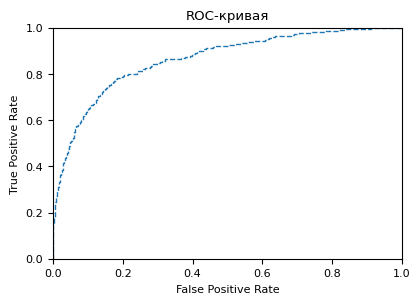

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, bal_best_rf.predict_proba(x_test)[:, 1])

plt.figure(figsize=(4.5, 3))
plt.plot(fpr, tpr, linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
#plt.figsize(8,4)
plt.show();

На вертикальной оси отмечен TPR (он же Recall), мы можем понизить порог и выделять, например, 80% потенциально уходящих клиентов. Но это непременно повлечет увеличение FPR c ~8% до 25% за счет увеличения ложно-положительных предсказаний FP и, соответственно, это приведет к большей раздаче бонусов. *Подобный результат показала модель логистической регрессии с балансировкой классов и она отличалась низкой точностью*. <br>

В попытке удержать как можно больше клиентов, мы можем потратить больше средств, чем эти клиенты могли бы принести. Но поскольку банковские маркетологи посчитали, что сохранить текущих клиентов дешевле, чем привлекать новых, такое решение вполне может быть оптимальным.